In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer_segmentation.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.shape

(2240, 29)

In [7]:
## missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [14]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [16]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [30]:
df['Age']=2026-df['Year_Birth']

In [31]:
df['Age']

0       69
1       72
2       61
3       42
4       45
        ..
2235    59
2236    80
2237    45
2238    70
2239    72
Name: Age, Length: 2216, dtype: int64

In [32]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Children,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,69,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,72,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,61,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,42,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,45,1,422


In [33]:
df['Total Children']=df['Kidhome']+df['Teenhome']

In [34]:
df['Total Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total Children, Length: 2216, dtype: int64

In [35]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Children,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,69,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,72,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,61,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,42,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,45,1,422


In [36]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total Children', 'Total_Spent'],
      dtype='object')

In [37]:
spend_cols=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

In [38]:
df['Total_Spent']=df[spend_cols].sum(axis=1)

In [39]:
df['Total_Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spent, Length: 2216, dtype: int64

In [41]:
df['Customer_Since']=(pd.Timestamp('today')-df['Dt_Customer']).dt.days

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

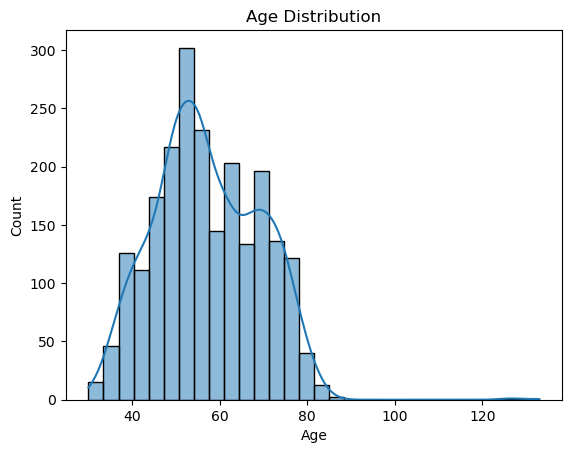

In [43]:
sns.histplot(df["Age"],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

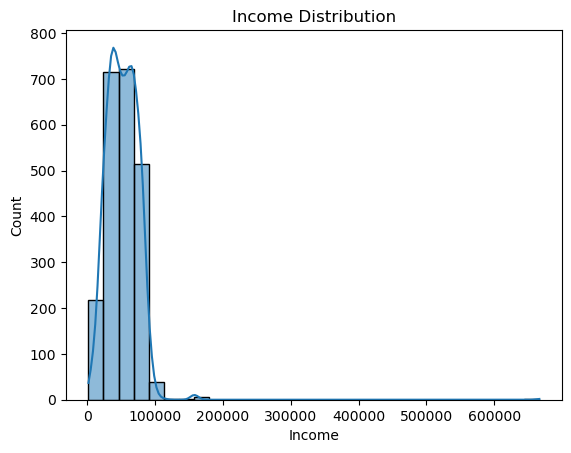

In [44]:
sns.histplot(df["Income"],bins=30,kde=True)
plt.title("Income Distribution")
plt.show()

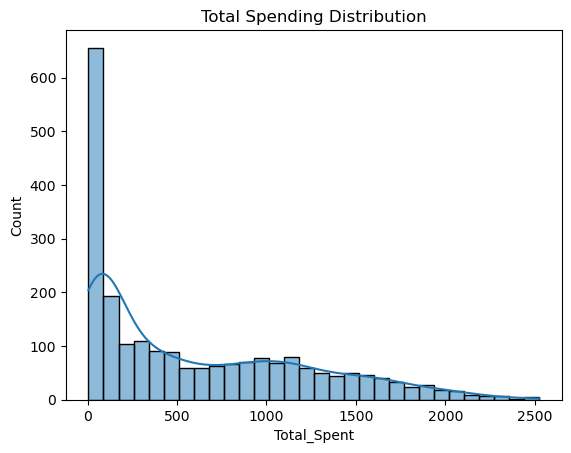

In [45]:
sns.histplot(df["Total_Spent"],bins=30,kde=True)
plt.title("Total Spending Distribution")
plt.show()

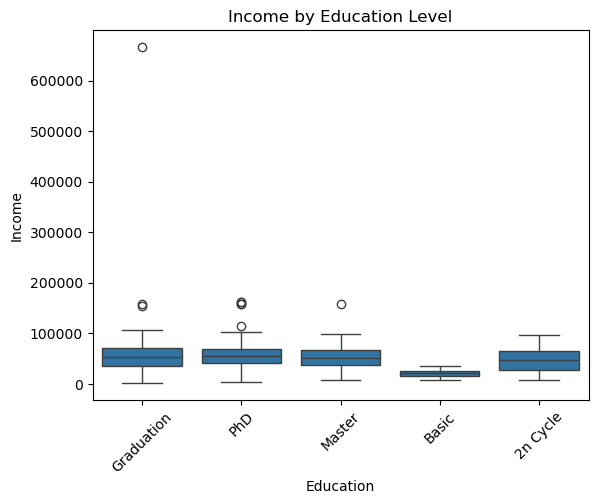

In [46]:
sns.boxplot(x='Education',y='Income',data=df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

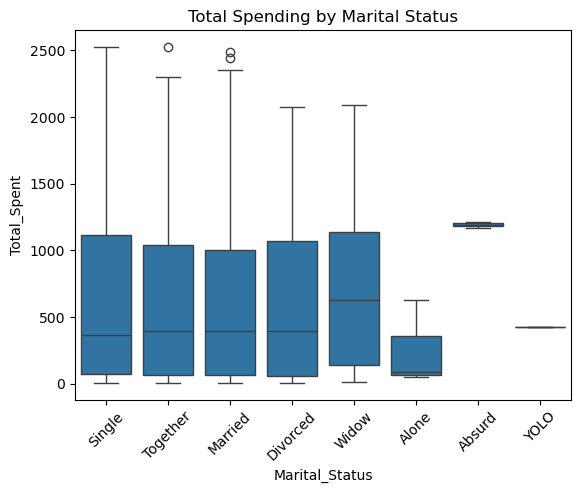

In [47]:
sns.boxplot(x='Marital_Status',y='Total_Spent',data=df)
plt.xticks(rotation=45)
plt.title("Total Spending by Marital Status")
plt.show()

In [53]:
corr=df[['Income','Age','Recency','Total_Spent','NumWebPurchases','NumStorePurchases']].corr()

In [54]:
corr

,Income,Age,Recency,Total_Spent,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spent,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


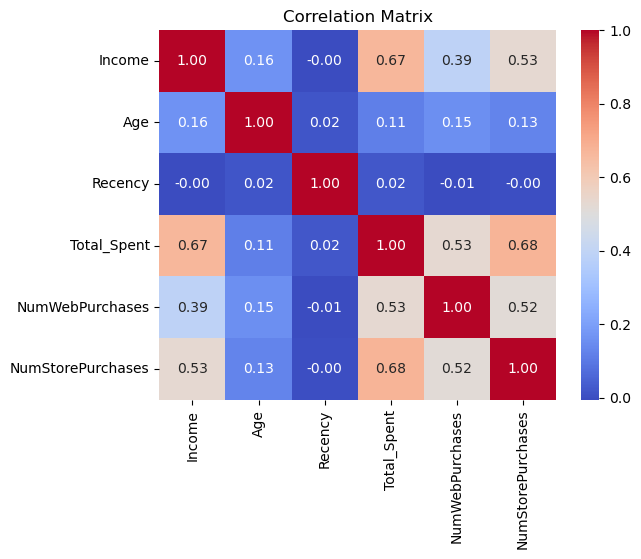

In [55]:
sns.heatmap(corr,annot=True,fmt=".2f",cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [60]:
pivot_income=df.pivot_table(index='Education',values='Income',columns='Marital_Status',aggfunc='mean')

In [61]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


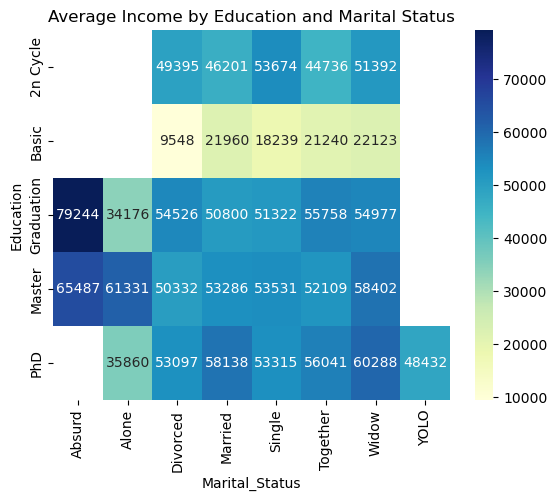

In [62]:
sns.heatmap(pivot_income,annot=True,fmt=".0f",cmap='YlGnBu')
plt.title("Average Income by Education and Marital Status")
plt.show()

In [65]:
group1=df.groupby("Education")["Total_Spent"].mean().sort_values(ascending=False)

In [66]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spent, dtype: float64

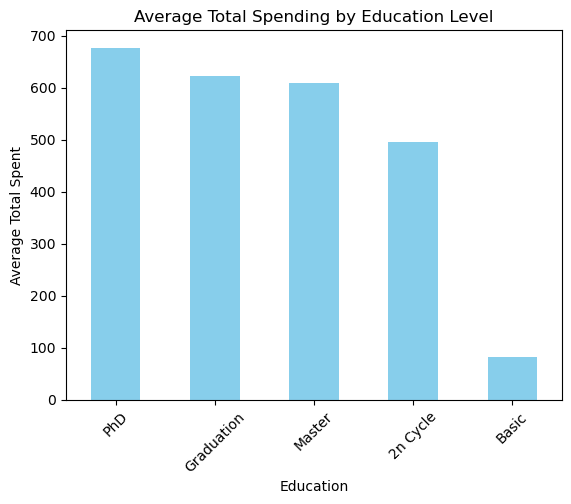

In [68]:
group1.plot(kind='bar',color='skyblue')
plt.title("Average Total Spending by Education Level")
plt.ylabel("Average Total Spent")
plt.xticks(rotation=45)
plt.show()

In [79]:
df['AcceptedAny']=df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',"Response"]].sum(axis=1)

In [81]:
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [82]:
df['AcceptedAny']=df['AcceptedAny'].apply(lambda x: 1 if x>0 else 0)

In [84]:
df['AcceptedAny'].unique()

array([1, 0], dtype=int64)

In [85]:
group2=df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [86]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

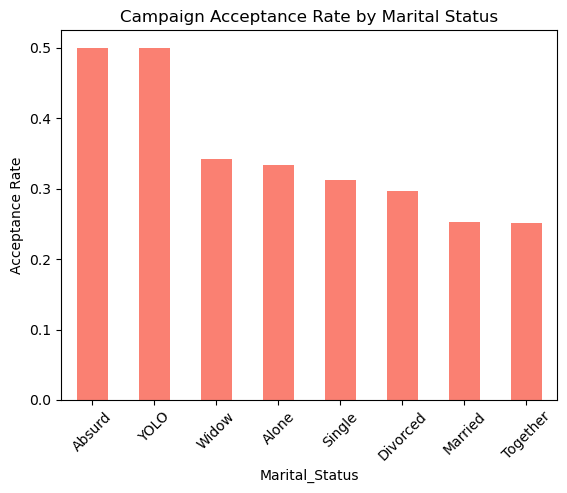

In [87]:
group2.plot(kind='bar',color='salmon')
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.show()

In [89]:
bins=[18,30,40,50,60,70,90]
labels=['18-29','30-39','40-49','50-59','60-69','70+']

In [91]:
df['Age_Group']=pd.cut(df['Age'],bins=bins,labels=labels)
df['Age_Group']

0       60-69
1         70+
2       60-69
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: Age_Group, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [92]:
group3=df.groupby("Age_Group")["Income"].mean()

C:\Users\Geetha chinmai\AppData\Local\Temp\ipykernel_3256\1943437188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3=df.groupby("Age_Group")["Income"].mean()


In [93]:
group3

Age_Group
18-29    10960.500000
30-39    47905.475676
40-49    48057.587649
50-59    50479.321534
60-69    55980.030928
70+      58767.083102
Name: Income, dtype: float64

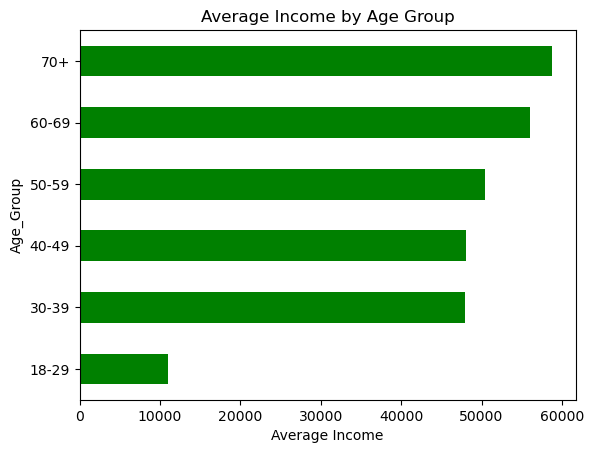

In [95]:
group3.plot(kind='barh',color='green')
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()

In [96]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Children,Total_Spent,Customer_Since,AcceptedAny,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,69,0,1617,4886,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,72,2,27,4336,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,61,0,776,4535,0,60-69
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,42,1,53,4362,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,45,1,422,4384,0,40-49


In [97]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total Children', 'Total_Spent', 'Customer_Since', 'AcceptedAny',
       'Age_Group'],
      dtype='object')

Age-Income-Total_Spent-NumWebPurchases-NumStorePurchases-NumWebVisitsMonth-Recency

In [140]:
features=['Age','Income','Total_Spent','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','Recency']

In [141]:
X=df[features].copy()

In [150]:
X

,Age,Income,Total_Spent,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,69,58138.0,1617,8,4,7,58
1,72,46344.0,27,1,2,5,38
2,61,71613.0,776,8,10,4,26
3,42,26646.0,53,2,4,6,26
4,45,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,59,61223.0,1341,9,4,5,46
2236,80,64014.0,444,8,5,7,56
2237,45,56981.0,1241,2,13,6,91
2238,70,69245.0,843,6,10,3,8


In [151]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [152]:
X_scaled=scaler.fit_transform(X)

In [153]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

### KMEANS CLUSTERING

In [154]:
from sklearn.cluster import KMeans

In [155]:
wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [156]:
wcss

[10218.620143748785,
 9007.783808892227,
 8159.2768460024545,
 7680.958742025184,
 7109.274284245588,
 6758.851192964985,
 6466.2859438101,
 6185.862047935249]

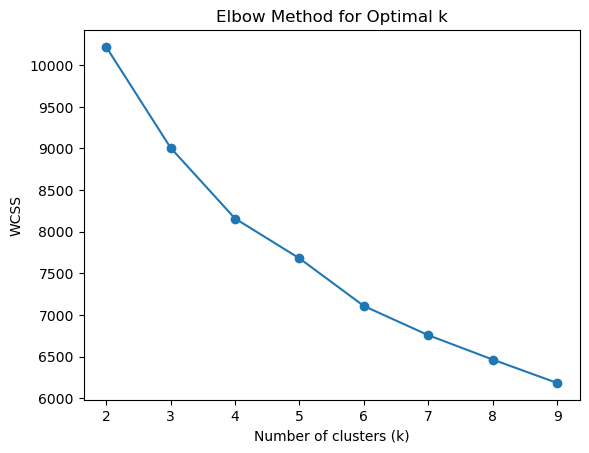

In [157]:
plt.plot(range(2,10),wcss,marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [161]:
kmeans=KMeans(n_clusters=6)
df["Cluster"]=kmeans.fit_predict(X_scaled)

In [162]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total Children,Total_Spent,Customer_Since,AcceptedAny,Age_Group,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,69,0,1617,4886,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,72,2,27,4336,0,70+,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,61,0,776,4535,0,60-69,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,42,1,53,4362,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,45,1,422,4384,0,40-49,4


In [163]:
cluster_summary=df.groupby("Cluster")[features].mean()

In [164]:
cluster_summary

,Age,Income,Total_Spent,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,48.114238,29842.187086,77.860927,1.913907,2.933775,6.965232,42.700331
1,61.392550,73904.553009,1218.366762,4.530086,8.318052,2.736390,75.157593
2,53.599303,78741.191638,1263.717770,4.557491,8.292683,2.571429,23.400697
3,62.119565,64879.271739,1091.771739,8.431159,9.507246,5.775362,44.778986
4,58.631902,50102.926380,507.312883,5.972393,5.680982,6.889571,43.662577
5,65.724599,40437.390374,116.687166,1.962567,3.540107,5.473262,62.251337


In [165]:
df['Cluster'].value_counts()

Cluster
0    604
5    374
1    349
4    326
2    287
3    276
Name: count, dtype: int64

In [166]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(X_scaled)
df["PCA1"]=pca_data[:,0]
df["PCA2"]=pca_data[:,1]

In [167]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]])

In [168]:
df['PCA1']

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

In [169]:
df['PCA2']

0      -0.211760
1       0.269839
2      -1.014161
3      -0.704928
4       1.235265
          ...   
2235   -0.535766
2236   -0.141328
2237    1.150570
2238   -1.160737
2239   -0.159636
Name: PCA2, Length: 2216, dtype: float64

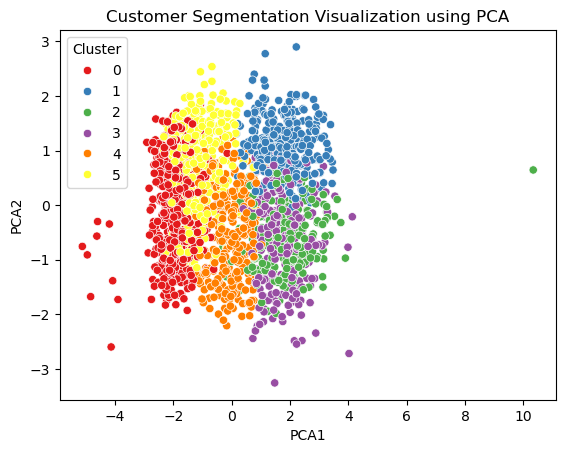

In [170]:
sns.scatterplot(x='PCA1',y='PCA2',hue='Cluster',data=df,palette='Set1')
plt.title("Customer Segmentation Visualization using PCA")
plt.show()

In [171]:
cluster_summary

,Age,Income,Total_Spent,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,48.114238,29842.187086,77.860927,1.913907,2.933775,6.965232,42.700331
1,61.392550,73904.553009,1218.366762,4.530086,8.318052,2.736390,75.157593
2,53.599303,78741.191638,1263.717770,4.557491,8.292683,2.571429,23.400697
3,62.119565,64879.271739,1091.771739,8.431159,9.507246,5.775362,44.778986
4,58.631902,50102.926380,507.312883,5.972393,5.680982,6.889571,43.662577
5,65.724599,40437.390374,116.687166,1.962567,3.540107,5.473262,62.251337


#### Cluster	Name
###### 0	Low-Income Occasional Shoppers
###### 1	High-Income Loyal Customers
###### 2	Top-Value Active Customers
###### 3	Omni-Channel Power Buyers
###### 4	Mid-Income Regular Shoppers
###### 5	Low-Value At-Risk Customers

In [172]:
import joblib
joblib.dump(kmeans,'customer_segmentation_kmeans_model.pkl')
joblib.dump(scaler,'customer_segmentation_scaler.pkl')

['customer_segmentation_scaler.pkl']